In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt #
import seaborn as sns

In [2]:
c_base = pd.read_csv("content/cardio_base.csv")
c_alco = pd.read_csv("content/cardio_alco.csv",sep=";")
covid_t = pd.read_csv("content/covid_data.csv")

In [3]:
c_base.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [4]:
c_base["age"] = (c_base["age"]/365).astype(int)

In [5]:
c_base.shape

(70000, 9)

In [6]:
c_base.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
smoke            int64
dtype: object

In [7]:
c_alco.head(5)
#So it's primary is on c_base

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0


In [8]:
c_alco.dtypes

id      int64
alco    int64
dtype: object

In [9]:
c_alco.shape

(56903, 2)

In [10]:
# pd.merge(c_alco,c_base,on="id",how="left").isna().sum()
c_alco = pd.merge(c_alco,c_base,on="id",how="left")

In [11]:
# pd.concat()

In [12]:
covid_t.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [13]:
covid_t.dtypes

location                       object
date                           object
new_cases                       int64
new_deaths                      int64
population                    float64
aged_65_older_percent         float64
gdp_per_capita                float64
hospital_beds_per_thousand    float64
dtype: object

In [15]:
covid_t["date"] = pd.to_datetime(covid_t["date"])

## 1. How much heavier the age group with the highest average weight than the age group with the lowest weight?

In [16]:
agg1 = c_base.groupby("age") \
        .agg(["mean","count","sum"])["weight"] \
        .sort_values("mean").reset_index()

# agg1
diff = agg1["mean"][len(agg1)-1] - agg1["mean"][0]
print(round((diff/agg1["mean"][0])*100,4)," %")

28.5995  %


Text(0, 0.5, 'Avg.Weight')

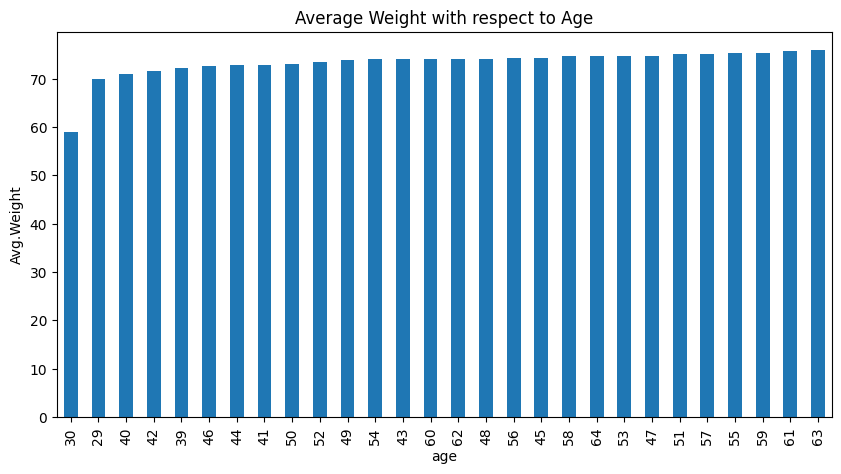

In [17]:
ax = c_base.groupby("age") \
        .agg(["mean","count","sum"])["weight"] \
        .sort_values("mean") \
        .reset_index() \
        .plot(x = "age",y = "mean",figsize=(10,5),kind="bar",title="Average Weight with respect to Age",legend = False)
ax.set_xlabel("age")
ax.set_ylabel("Avg.Weight")

## 2. Do people over 50 have higher cholesterol levels than the rest?

In [18]:
less_than_50 = c_base.groupby("age") \
                    .agg("mean")["cholesterol"]  \
                    .reset_index() \
                    .query("age<50")["cholesterol"] \
                    .mean()

greater_than_50 = c_base.groupby("age") \
                    .agg("mean")["cholesterol"]  \
                    .reset_index() \
                    .query("age>=50")["cholesterol"] \
                    .mean()

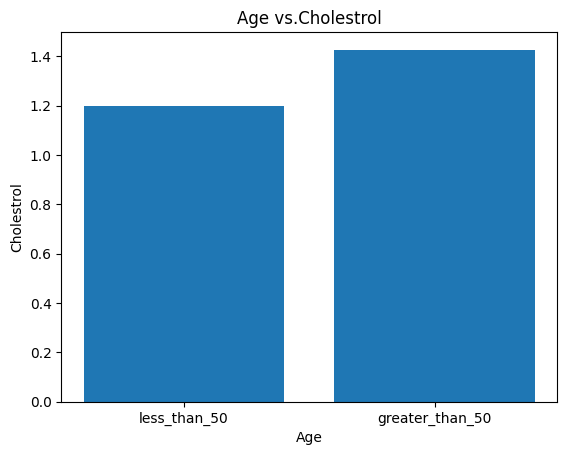

In [19]:
ax = plt.bar(["less_than_50","greater_than_50"],[less_than_50,greater_than_50])
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.title("Age vs.Cholestrol")
plt.show()

In [20]:
less_than_50 < greater_than_50

np.True_

## 3. Are men more likely to be a smoker than women?

In [21]:
c_base.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

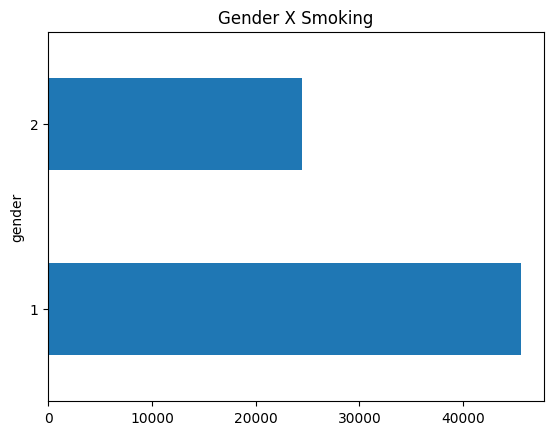

In [22]:
ax = c_base.groupby("gender") \
    .agg(["count"])["smoke"] \
    .plot(kind="barh",title="Gender X Smoking",legend=False)

plt.show() #men are more likely to be smoking than women

## 4. How tall are the tallest 1% of people?

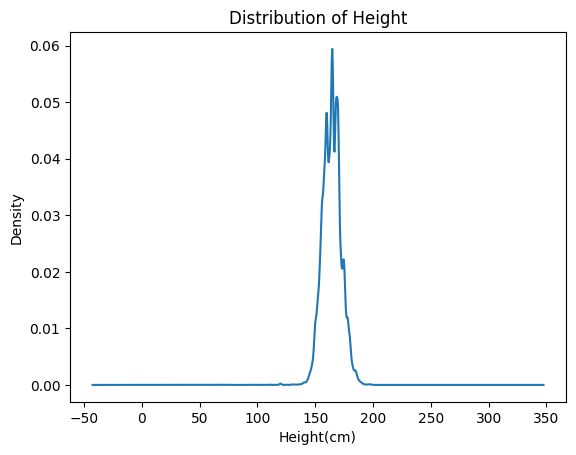

In [23]:
##Understanding the distribution
ax = c_base["height"].plot(kind="kde",title="Distribution of Height")
plt.xlabel("Height(cm)")
plt.show()

In [24]:
c_base["height"].sort_values(ascending=False).mean() ## Wrong Approach

np.float64(164.35922857142856)

In [25]:
# a = pd.Series([1,2,3,4,5])

# # a.median()
# a.quantile(1)

In [26]:
## Quantile would be more easier to calculate percentages problems
c_base["height"].quantile(0.99)

np.float64(184.0)

## 5. Which two features have the highest spearman rank correlation?

It rank the values on the data and finds the relation

6.Sum(difference(rank(x-y))^2) / (n*(n^2 - 1))

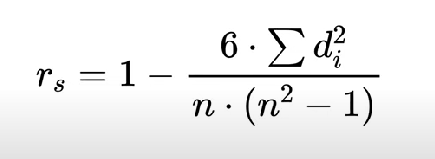

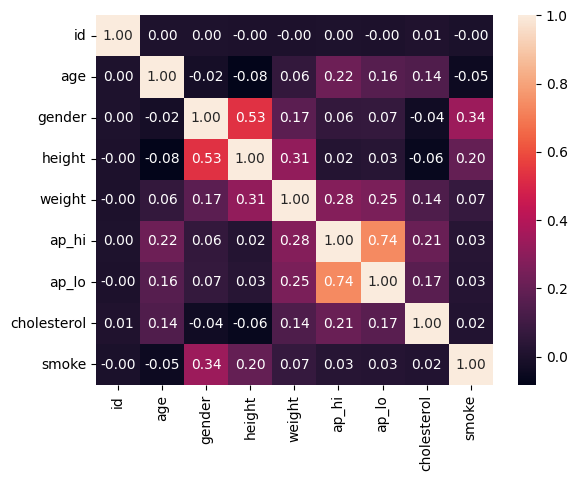

In [28]:
sns.heatmap(c_base.corr(method='spearman'),annot=True,fmt=".2f")
plt.show()

## 6. What percentage of people are more than 2 standard deviations far from the average height?

In [29]:
mean_height = c_base["height"].mean()
std_height = c_base["height"].std()

In [30]:
people_with_deviation = len(c_base[abs(c_base["height"] - mean_height) > 2*std_height])
total_people = len(c_base)

people_with_deviation / total_people *100

3.3357142857142854

## 7. What percentage of the population over 50 years old consume alcohol? Ignore those persons, where we have no alcohol sonsumption information!

CPU times: total: 46.9 ms
Wall time: 55 ms


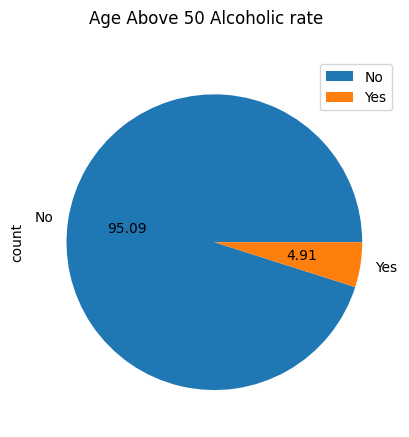

In [35]:
%%time
ax = c_alco.query("age > 50") \
    .groupby("alco") \
    .agg(["count"])["id"] \
    .plot(kind="pie",labels=["No","Yes"],subplots= True,autopct="%.2f",title="Age Above 50 Alcoholic rate")

## 8. Which of the following statements is true with 95% confidence?

### ⚪Smokers have higher blood presure than non-smokers
### ⚪Smokers have higher cholesterol level than non-smokers
### ⚪Smokers weight less than non smokers
### ⚪Men have higher blood pressure than women

In [36]:
# Smokers have higher blood presure than non-smokers

c_alco["avg_bp"] = (c_alco["ap_hi"]+c_alco["ap_lo"]) / 2
grped = c_alco.groupby("smoke").agg(["mean","sem"])["avg_bp"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped

,mean,sem,hi_bound,low_bound
smoke,,,,
0,112.851959,0.562122,113.953718,111.750200
1,113.139016,1.241633,115.572617,110.705415


In [37]:
# Smokers have higher cholesterol level than non-smokers

grped = c_alco.groupby("smoke").agg(["mean","sem"])["cholesterol"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped

,mean,sem,hi_bound,low_bound
smoke,,,,
0,1.365668,0.002989,1.371526,1.359810
1,1.390554,0.009616,1.409401,1.371706


In [38]:
# Smokers weight less than non smokers

grped = c_alco.groupby("smoke").agg(["mean","sem"])["weight"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped

,mean,sem,hi_bound,low_bound
smoke,,,,
0,73.853289,0.062684,73.976150,73.730429
1,77.356142,0.212276,77.772203,76.940081


In [39]:
# Men have higher blood pressure than women

grped = c_alco.groupby("gender").agg(["mean","sem"])["avg_bp"]
grped["hi_bound"] = grped["mean"] + 1.96 * grped["sem"]
grped["low_bound"] = grped["mean"] - 1.96 * grped["sem"]
grped

,mean,sem,hi_bound,low_bound
gender,,,,
1,111.749641,0.636337,112.996862,110.502421
2,114.965621,0.918838,116.766543,113.164699


### Usually 95% confidence works between two variables works in the way that, 95% is be **True** that the **high bound(hi_bound) and the low bound(low_bound) ranges** should not be overlap between the target(i.e here gender,smoke)

## 9. When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?

In [40]:
covid_t.head(4)

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5


In [41]:
# covid_t.query('location in ["Italy","Germany"]').groupby(["date","location"]).agg(["sum"])

german = covid_t.loc[covid_t["location"] == "Germany"]
german["cumsum-ger"] = german["new_cases"].cumsum()
italy = covid_t.loc[covid_t["location"] == "Italy"]
italy["cumsum-ita"] = italy["new_cases"].cumsum()

C:\Users\ajitj\AppData\Local\Temp\ipykernel_3888\3275853270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german["cumsum-ger"] = german["new_cases"].cumsum()
C:\Users\ajitj\AppData\Local\Temp\ipykernel_3888\3275853270.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy["cumsum-ita"] = italy["new_cases"].cumsum()


In [42]:
joined = pd.merge(german,italy,on="date")

In [43]:
joined[abs(joined["cumsum-ger"]-joined["cumsum-ita"])>10000]["date"].min()

Timestamp('2020-03-12 00:00:00')

## 10. Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

In [44]:
between_dates = italy.query('date <= "2020-03-20" and date> "2020-02-29"')

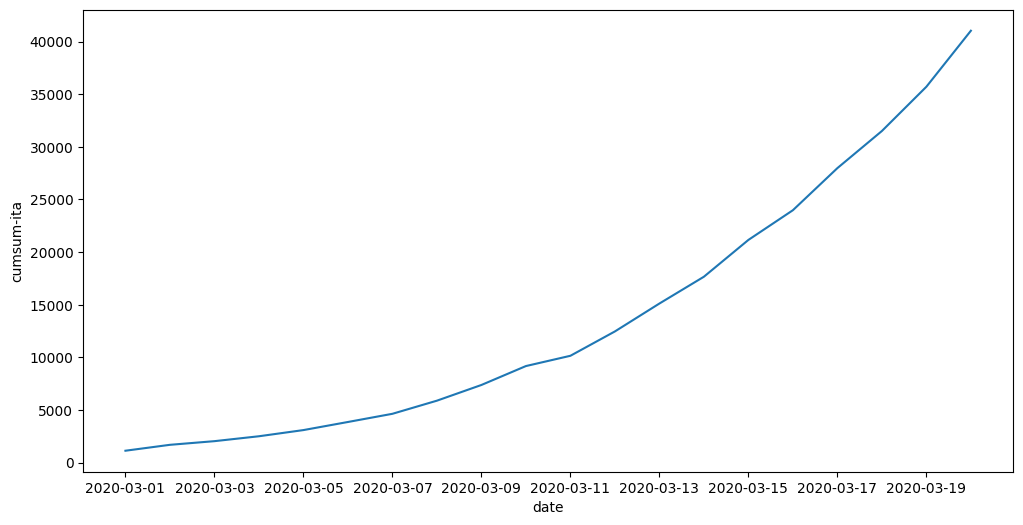

In [45]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(between_dates,x="date",y="cumsum-ita")
plt.show()

## 11. Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

In [46]:
country_rate = covid_t.groupby("location").agg({"new_deaths":"sum","aged_65_older_percent":"mean","population":"mean"})
country_rate["death_rate"] = country_rate["new_deaths"] / country_rate["population"] * 10_00_000

In [47]:
country_rate.sort_values(by="death_rate",ascending=False).dropna()

,new_deaths,aged_65_older_percent,population,death_rate
location,,,,
Belgium,9619,18.571,11589616.0,829.967102
United Kingdom,40883,18.517,67886004.0,602.230174
Spain,27136,19.436,46754783.0,580.389818
Italy,34043,23.021,60461828.0,563.049467
Sweden,4717,19.985,10099270.0,467.063461
...,...,...,...,...
Saint Lucia,0,9.721,183629.0,0.000000
Saint Vincent and the Grenadines,0,7.724,110947.0,0.000000
Timor,0,3.556,1318442.0,0.000000


In [ ]:
## Need to solve this one

## 12. What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!

In [48]:
aged_greater_20 = country_rate.query(' aged_65_older_percent > 20')
aged_greater_20_50Million = aged_greater_20.query(' death_rate > 50')

In [49]:
from sklearn.metrics import f1_score

y_true = [1] * len(aged_greater_20)
y_pred = [1] * len(aged_greater_20_50Million) + [0] * (len(aged_greater_20)-len(aged_greater_20_50Million))

In [50]:
f1_score(y_true,y_pred)

np.float64(0.7272727272727273)

## 13. What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [51]:
atleast_5Hospitals = covid_t.query(' hospital_beds_per_thousand >= 5').dropna().groupby("location").agg({"gdp_per_capita":"mean","hospital_beds_per_thousand":"min"})

In [52]:
len(atleast_5Hospitals)

26

In [53]:
len(atleast_5Hospitals.query(' gdp_per_capita > 10000 ')) / len(atleast_5Hospitals) * 100

88.46153846153845